In [1]:
#ANZ Virtual Internship

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = 'D:\Virtual Internship'
os.chdir(path)

In [4]:
ds = pd. read_excel('ANZ.xlsx')

In [5]:
ds.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [6]:
ds.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [7]:
#Average Transaction amount
mean_amt= ds['amount'].mean()
mean_amt

187.93358797641767

In [8]:
ds1 = ds [["status","card_present_flag","balance","date","gender","age","amount","customer_id","movement"]]
ds1.head()

,status,card_present_flag,balance,date,gender,age,amount,customer_id,movement
0,authorized,1.0,35.39,2018-08-01,F,26,16.25,CUS-2487424745,debit
1,authorized,0.0,21.20,2018-08-01,F,26,14.19,CUS-2487424745,debit
2,authorized,1.0,5.71,2018-08-01,M,38,6.42,CUS-2142601169,debit
3,authorized,1.0,2117.22,2018-08-01,F,40,40.90,CUS-1614226872,debit
4,authorized,1.0,17.95,2018-08-01,F,26,3.25,CUS-2487424745,debit


In [9]:
ds["account"].nunique() # to check for 100 unique customers 

100

In [10]:
ds["date"].value_counts()

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
             ... 
2018-08-06     99
2018-08-20     97
2018-10-23     96
2018-10-08     95
2018-10-30     89
Name: date, Length: 91, dtype: int64

In [11]:
ds["customer_id"].value_counts()

CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
                 ... 
CUS-3395687666     40
CUS-3201519139     37
CUS-1646183815     34
CUS-495599312      31
CUS-1739931018     25
Name: customer_id, Length: 100, dtype: int64

In [12]:
#To calculate the average transactions per day
ds_sum = ds1.groupby('date') ['amount'].sum().reset_index()
ds_sum

ds_mean = ds1.groupby('date')['amount'].mean().reset_index()
ds_mean

,date,amount
0,2018-08-01,218.014161
1,2018-08-02,143.331053
2,2018-08-03,242.653376
3,2018-08-04,53.356356
4,2018-08-05,44.265000
...,...,...
86,2018-10-27,50.155252
87,2018-10-28,59.007762
88,2018-10-29,377.932745
89,2018-10-30,247.891461


Text(0.5, 1.0, 'Mean of Transaction')

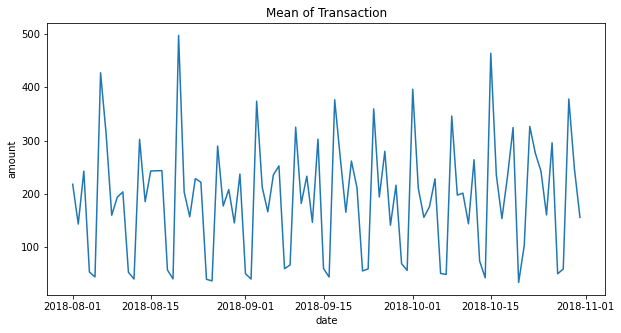

In [13]:
plt.figure(figsize =(10,5))
sns.lineplot(y="amount", x="date",data= ds_mean)
plt.title("Mean of Transaction")

Text(0.5, 1.0, 'Sum of Transaction')

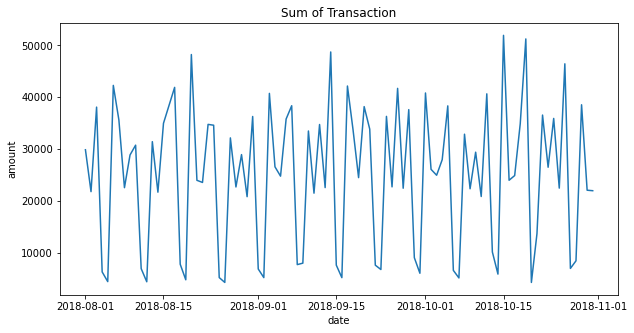

In [14]:
plt.figure(figsize =(10,5))
sns.lineplot(y="amount", x="date",data= ds_sum )
plt.title("Sum of Transaction")

In [15]:
ds["merchant_suburb"].nunique()

1609

In [16]:
#Transaction by suburb
sub_ds = ds.groupby( 'merchant_suburb')['amount'].sum().reset_index()
sub_ds.head()
sub_sorted= sub_ds.sort_values(by='amount', ascending = False)
sub_sorted

,merchant_suburb,amount
1380,Sydney,21675.44
893,Melbourne,11943.53
1322,South Brisbane,11740.58
880,Mascot,10282.62
978,Mount Gambier,4710.25
...,...,...
615,Hallidays Point,3.86
814,Lindum,3.46
327,Clyde North,2.98
1578,Woombye,2.54


Text(0.5, 1.0, 'Top suburbs with highest transaction')

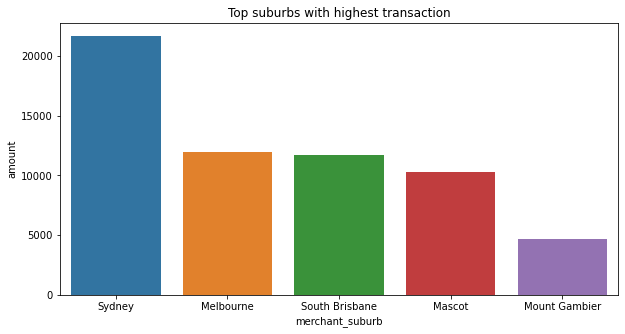

In [17]:
plt.figure(figsize=(10, 5))
sns.barplot(y='amount', x='merchant_suburb', data= sub_sorted.head() )
plt.title('Top suburbs with highest transaction')

In [18]:
sub_mean = ds.groupby( 'merchant_suburb')['amount'].mean().reset_index()
sub_mean.head()
sub_sorted_mean= sub_mean.sort_values(by='amount', ascending = False)
sub_sorted_mean


,merchant_suburb,amount
1126,Pantapin,829.765000
555,Gladesville,734.100000
1528,West Wodonga,559.330000
1322,South Brisbane,559.075238
1130,Parap,553.918333
...,...,...
615,Hallidays Point,3.860000
814,Lindum,3.460000
327,Clyde North,2.980000
1578,Woombye,2.540000


Text(0.5, 1.0, 'Top mean of suburb transaction')

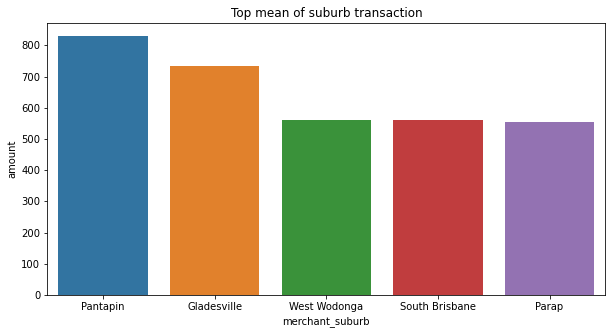

In [19]:
plt.figure(figsize=(10, 5))
sns.barplot(y='amount', x='merchant_suburb', data= sub_sorted_mean.head() )
plt.title('Top mean of suburb transaction')

In [20]:
#Transaction based on gender and age
age_bal = ds.groupby(['age','gender'])['amount'].sum().reset_index()
age_bal.head()



,age,gender,amount
0,18,F,45124.14
1,18,M,34020.50
2,19,F,84318.80
3,19,M,61733.92
4,20,F,49579.79


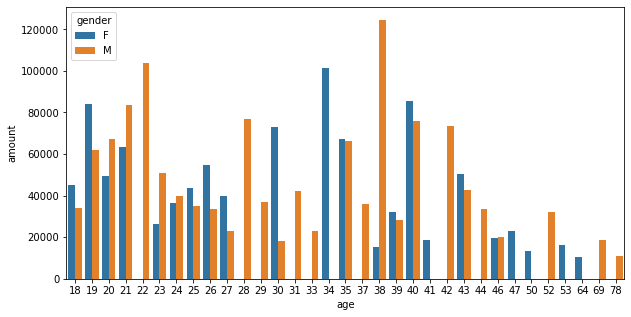

In [21]:
plt.figure (figsize=(10,5))
sns.barplot(y='amount', x='age', hue='gender', data=age_bal)

In [22]:
age_mean = ds.groupby(['age','gender'])['amount'].mean().reset_index()
age_mean.head()

,age,gender,amount
0,18,F,151.933131
1,18,M,234.624138
2,19,F,244.402319
3,19,M,177.396322
4,20,F,135.835041


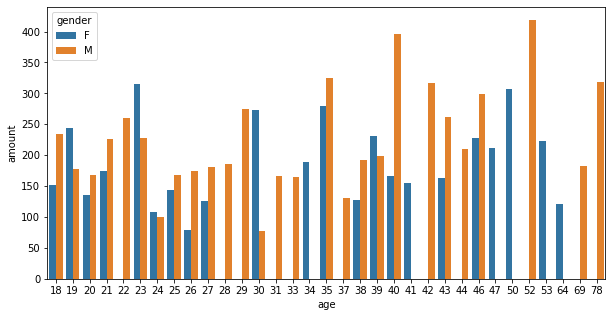

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(y='amount',x='age', hue='gender', data= age_mean)

In [25]:
#State wise 

ds_state= ds.groupby(['merchant_state'])['amount'].sum().reset_index()
ds_state
ds_state_sorted= ds_state.sort_values(by='amount', ascending = False)
ds_state_sorted

,merchant_state,amount
1,NSW,102021.77
6,VIC,87584.00
3,QLD,53483.45
7,WA,33992.06
4,SA,16776.57
2,NT,9168.89
0,ACT,4876.68
5,TAS,1962.93


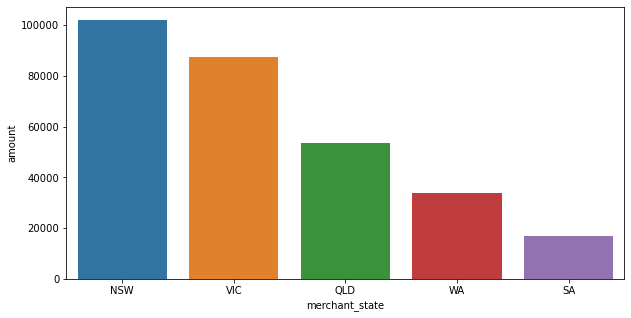

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(y='amount', x='merchant_state', data= ds_state_sorted.head())

In [31]:
#Average state transaction
ds_state_avg= ds.groupby(['merchant_state'])['amount'].mean().reset_index()
ds_state_avg
ds_state_mean= ds_state_avg.sort_values(by='amount', ascending = False)
ds_state_mean

,merchant_state,amount
0,ACT,66.803836
1,NSW,47.036316
2,NT,44.726293
6,VIC,41.099953
4,SA,40.425470
3,QLD,34.372397
7,WA,30.901873
5,TAS,28.866618


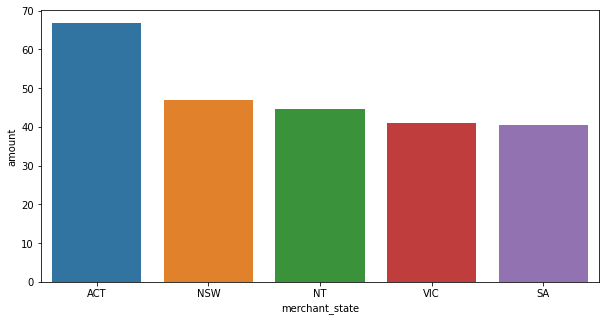

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(y='amount', x='merchant_state', data= ds_state_mean.head())

In [33]:
ds_gender= ds.groupby(['gender'])['amount'].sum().reset_index()
ds_gender

,gender,amount
0,F,970322.63
1,M,1292961.57


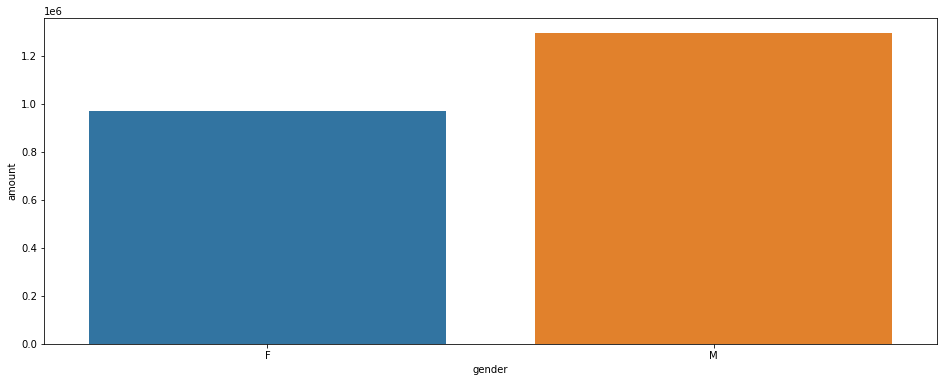

In [37]:
plt.figure(figsize=(16, 6))
sns.barplot(y="amount",x="gender", data=ds_gender)